In [35]:
%pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### Importing libraries

In [47]:
import pandas as pd
import numpy as np
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns 

##### Load the dataset

In [37]:
voice_df = pd.read_csv('voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute - difference between adjacent measurements of fundamental frequencies divided by the frequency range


- **label: male or female**

##### Check for null values

In [38]:
TOTAL = voice_df.isnull().sum() # total of missing values
PERCENT = round(TOTAL/len(voice_df)*100,1) #Percentage of missinig values
df_miss_dat = pd.DataFrame(columns={"total":TOTAL, "Percent":PERCENT}, index=voice_df.columns) #create Dataframe for missing values
df_miss_dat["total"]  = TOTAL #completing columns with calculated values
df_miss_dat["Percent"] = PERCENT
df_M_V = df_miss_dat.sort_values(by="Percent", ascending=False) # final dataframe
df_M_V

,total,Percent
meanfreq,0,0.0
centroid,0,0.0
modindx,0,0.0
dfrange,0,0.0
maxdom,0,0.0
mindom,0,0.0
meandom,0,0.0
maxfun,0,0.0
minfun,0,0.0
meanfun,0,0.0


There was no missing values

##### Features Analisys

Labels

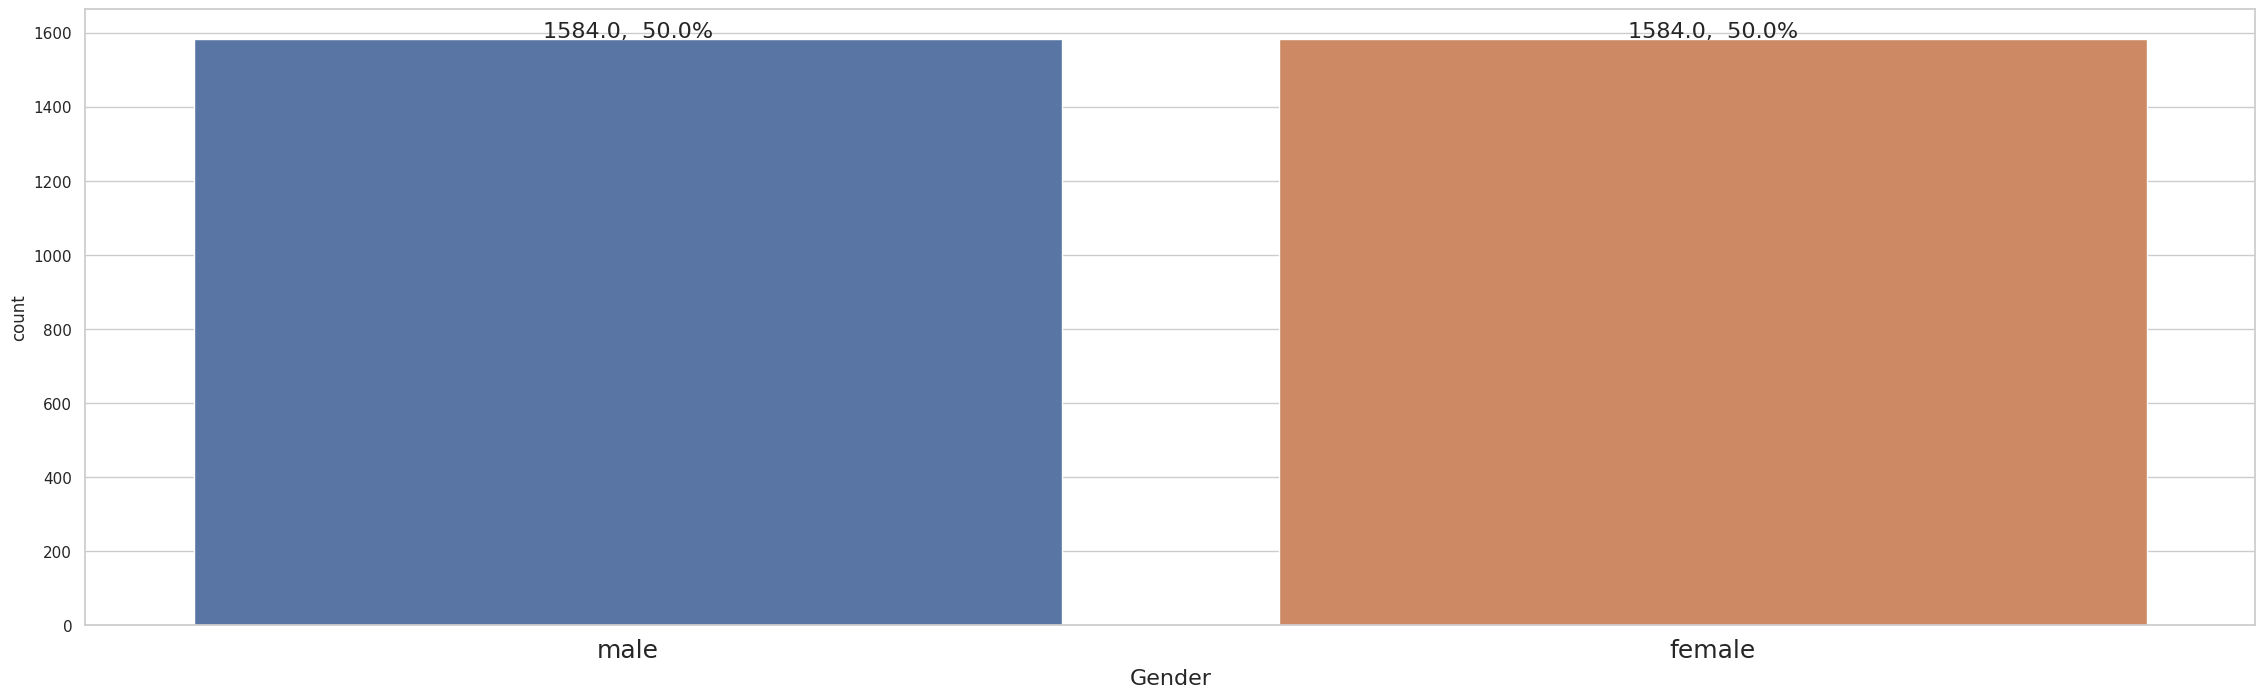

In [39]:
"""
LET'S ANALYZE GENDER USING A COUNT PLOT

"""

sns.set(style="whitegrid")
total = sum(voice_df["label"].notna()) 
# Defining the plot size
plt.figure(figsize=(28, 8))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="label", data=voice_df)

# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=16, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.xlabel("Gender", fontsize=16)
plt.xticks(fontsize=18)
# showing the plot
plt.show()

In [40]:
### it's a perfect balanced dataset! 

/tmp/ipykernel_10575/2887200457.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  voice_df.corr(),


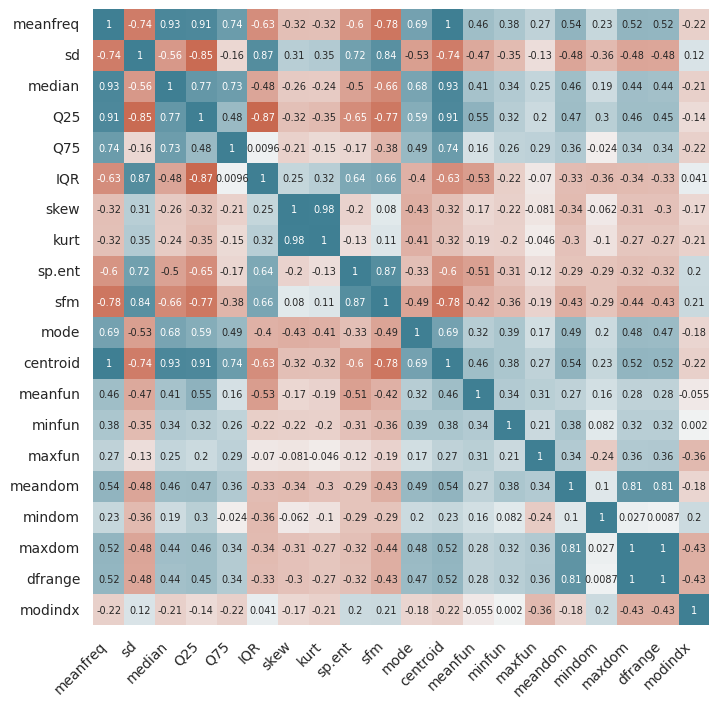

In [41]:
# Heatmap 
# ==============================================================================


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    voice_df.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 7},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

##### Feature Engineering

In [42]:
# Let's Separate the target from other features
y = voice_df.iloc[:,-1]
X = voice_df.iloc[:, :-1]


In [43]:
### Encodig and Standarization

#Encoding
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

#Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [44]:
### Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Runnung SVM with default parameters

In [49]:
svm = SVC() #default hyperparameters
svm.fit(X_train, y_train) #fitting training features
y_pred = svm.predict(X_test)
print('Accuracy Score for default parameters:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for default parameters:
0.9763406940063092


Running SVM with different Kernels but with their default hyperparameters

In [50]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Linear:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Polynomial:') #Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score Linear:
0.9779179810725552
Accuracy Score RBF:
0.9763406940063092
Accuracy Score Polynomial:
0.9589905362776026


Cross Validation with linear kernel

In [51]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]
0.9696991175178692


Check the C hyperparameter in depth for the Linear Kernel

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

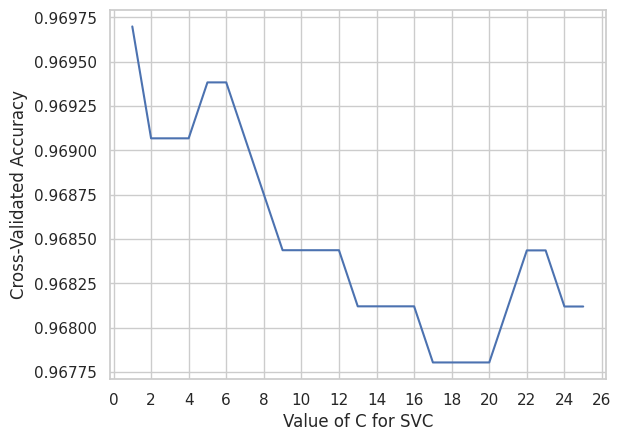

In [52]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')